In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 


In [2]:
df = pd.read_csv("economic_index.csv")

In [3]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [4]:
df.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)

In [5]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [6]:
import seaborn as sns 

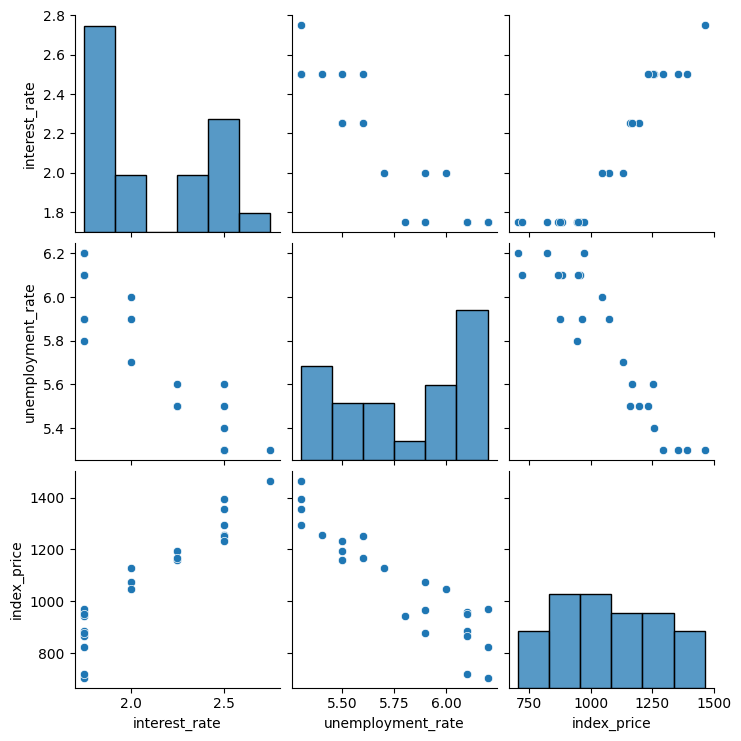

In [7]:
sns.pairplot(df)

In [8]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [9]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment_rate')

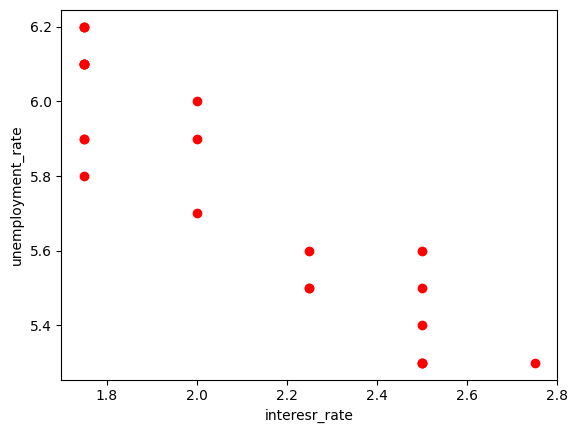

In [13]:
plt.scatter(df["interest_rate"],df["unemployment_rate"],color='r')
plt.xlabel("interesr_rate")
plt.ylabel("unemployment_rate")

In [21]:
#dependent and independent features 
X=df.iloc[:,:-1]# all except the last column #or X=df[[]]
y=df.iloc[:,-1]#last column  #or y=df[]

In [22]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [23]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [24]:
#train test split 
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

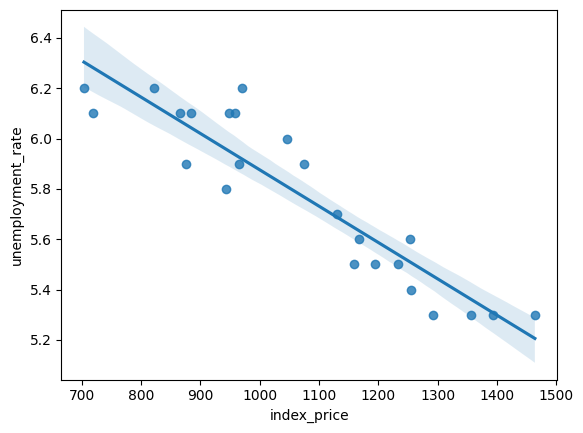

In [29]:
sns.regplot(x=df['index_price'],y=df['unemployment_rate'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

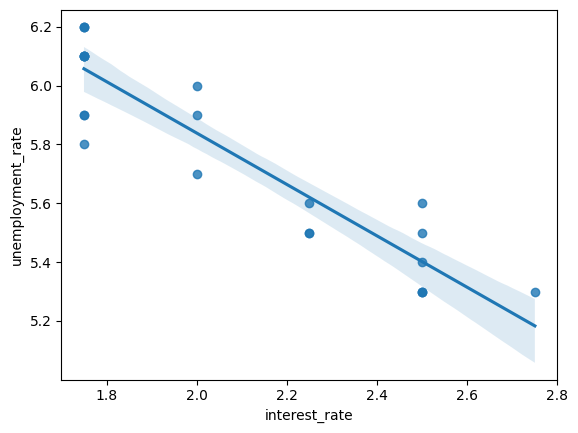

In [30]:
sns.regplot(x=df['interest_rate'],y=df['unemployment_rate'])

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [32]:
X_train = scaler.fit_transform(X_train)

In [39]:
X_test=scaler.transform(X_test)

In [40]:
X_test

array([[ 0.15317012, -0.78031963],
       [-1.26208271,  1.35779251],
       [ 1.56842294, -1.39120882],
       [-1.26208271,  1.05234792],
       [-0.55445629,  0.44145873],
       [ 0.15317012, -0.47487504]])

In [41]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [42]:
regression.fit(X_train,y_train)

LinearRegression()

In [43]:
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression,X_train,y_train,scoring="neg_mean_squared_error",cv=3)

In [44]:
validation_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [45]:
np.mean(validation_score)

-5914.828180162396

In [46]:
##prediction 
y_pred = regression.predict(X_test)

In [47]:
y_pred

array([1157.6829378 ,  784.18382464, 1353.63144583,  819.69394566,
        953.17832071, 1122.17281677])

In [49]:
#performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse = mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

11344.75038425181
88.24278476465587
106.51173824631636


In [54]:
from sklearn.metrics import r2_score
r_score = r2_score(y_test,y_pred)
print(r_score)
#adjusted Rscore 
print(1 - (1-r_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.6630071969349127
0.4383453282248545


Assumptions

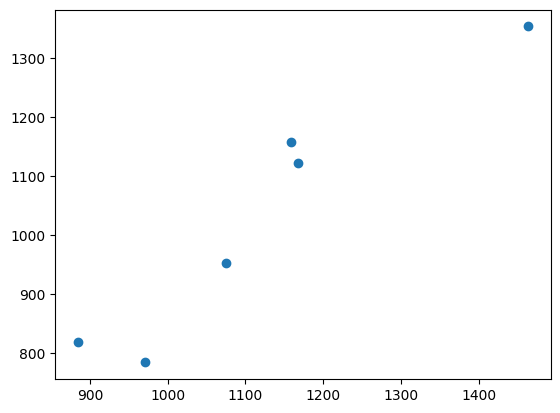

In [55]:
plt.scatter(y_test,y_pred) #linear plot is obtained 

In [56]:
residuals=y_test-y_pred # or error
print(residuals)

8       1.317062
16    186.816175
0     110.368554
18     64.306054
11    121.821679
9      44.827183
Name: index_price, dtype: float64


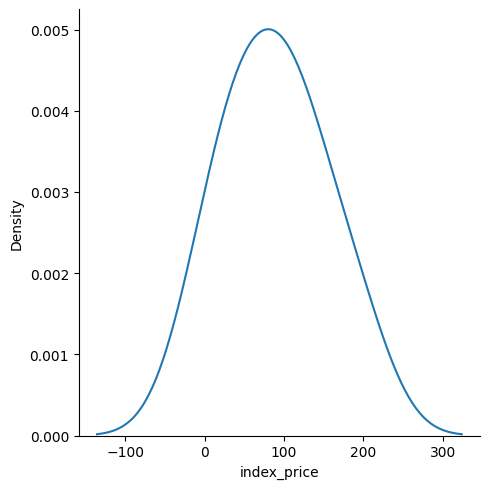

In [62]:
sns.displot(residuals,kind='kde') #normal curve is obtained  

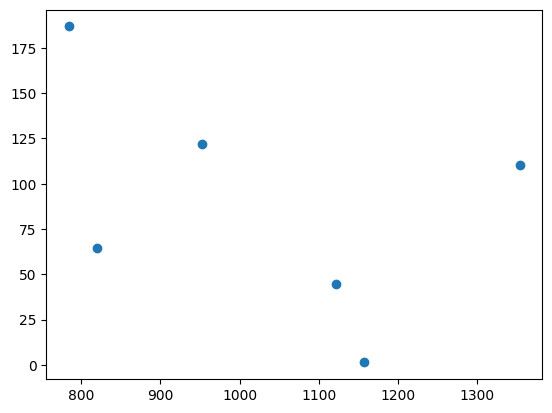

In [63]:
plt.scatter(y_pred,residuals)

In [64]:
print(regression.coef_)
print(regression.intercept_)

[  88.27275507 -116.25716066]
1053.4444444444443


In [65]:
import statsmodels.api as sm

In [66]:
model = sm.OLS(y_train,X_train).fit()

In [68]:
prediction = model.predict(X_test)
print(prediction)

[ 104.23849336 -269.26061981  300.18700139 -233.75049878 -100.26612374
   68.72837233]


In [69]:
model.summary()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Fri, 12 Jul 2024   Prob (F-statistic):                       0.754
Time:                        19:08:23   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""